# Access to additional unlabeled data

## Dependencies
Let's install the vesuvius library that will be used to access the available CT scans.
The code is available [here](https://github.com/ScrollPrize/villa/tree/main/vesuvius).

In [1]:
# install vesuvius & dependencies
!pip install --quiet vesuvius matplotlib > /dev/null 2>&1

# Accept the Vesuvius Challenge data license (required before first use).
# This is a non-interactive acceptance; see https://scrollprize.org/data for details.
!vesuvius.accept_terms --yes


    ## LICENSE

    All Vesuvius Challenge datasets are released under CC BY-NC 4.0 (https://creativecommons.org/licenses/by-nc/4.0/legalcode.txt), except Scrolls 1–4 and Fragments 1–6, which are bound by the following terms:

    By registering for downloads from the EduceLab-Scrolls Dataset and Vesuvius Challenge Discord Server, I agree to license the data from Vesuvius Challenge* under the following licensing terms:
    - I agree that all points below apply to both the EduceLab-Scrolls Dataset downloaded from our webserver, as well as any data (e.g. text, pictures, code) downloaded from the Vesuvius Challenge Discord Server.
    - I will not redistribute the data without the written approval of Vesuvius Challenge (if I am working in a team, every team member will sign this form separately).
    Vesuvius Challenge reserves the right to use in any way, including in an academic or other publication, all submissions or results produced from this dataset.
    - I will not make public (o

## Import and chunk size
We are now going to import basic python libraries, like **numpy**, **matplotlib**, and the recently installed **vesuvius** library.
We will also define some basic plot properties and the size of an isotropic chunk we want to extract from the CT scan of the scrolls.

In [2]:
# imports and plotting config
import numpy as np
import matplotlib.pyplot as plt

import vesuvius
from vesuvius import Volume

plt.rcParams["figure.figsize"] = (6, 6)
plt.rcParams["image.cmap"] = "gray"  # grayscale is easier for CT volumes

CHUNK_SIZE = 256

We have scanned more than 30 scrolls, but most of them are unreleased.

The URLs to the CT scans of the released scrolls are available [here](https://scrollprize.org/data_scrolls) and the URLs to fragments (pieces of scrolls mechanically detached) are [here](https://scrollprize.org/data_fragments).

Be careful because not all of them are available as Zarr (the format we need). Some of them could have been normalized/compressed in a non-canonical way.

We recommend working on these two, which were acquired using a protocol we used for the majority of our unreleased scans:
- PHerc. 0139 _(scroll)_
- PHerc. 0009B _(fragment)_


In [ ]:
PHERC_0139_URL_9um = "https://data.aws.ash2txt.org/samples/PHerc0139/volumes/20250728140407-9.362um-1.2m-113keV-masked.zarr/"
PHERC_0009B_URL_9um = "https://data.aws.ash2txt.org/samples/PHerc0009B/volumes/20250521125136-8.640um-1.2m-116keV-masked.zarr/ "

These zarr stores are actually OME-Zarr, and the folder contains several subfolders corresponding to downscaled versions of the same volume.

We will access to the native scale which is in subfolder **0**.

The conventional coordinate frame in the volumes is _Z,Y,X_.

In [ ]:
scroll = Volume(type="tif", path=PHERC_0139_URL_9um)
print(f"Shape: {scroll.shape()}")
print(f"dtype: {scroll.dtype}")

Shape: (20974, 6621, 6621)
dtype: uint8


Great! We lazy loaded the scan! Let's download a chunk from the full volume by specifying its bounding box!

Chunk shape: (256, 6621, 6621)


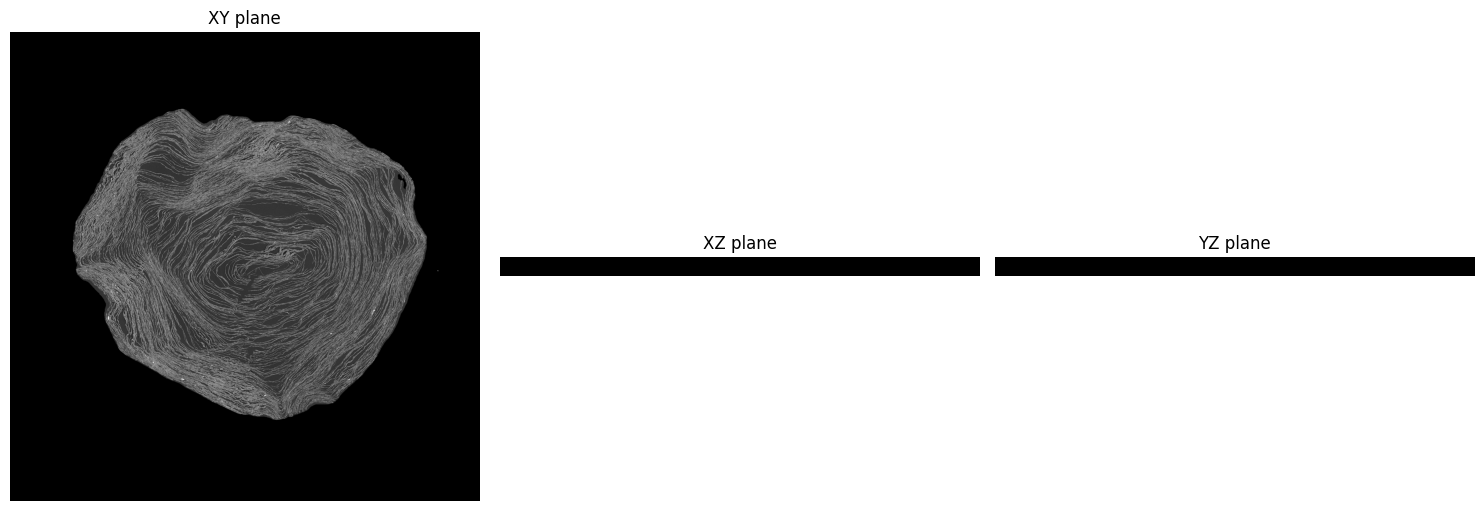

In [23]:
chunk = scroll[10000:10000+CHUNK_SIZE,:,:]
print(f"Chunk shape: {chunk.shape}")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Z=100, XY
axes[0].imshow(chunk[100, :, :])
axes[0].set_title('XY plane')
axes[0].axis('off')

# Y=100, XZ
axes[1].imshow(chunk[:, 100, :])
axes[1].set_title('XZ plane')
axes[1].axis('off')

# X=100, YZ
axes[2].imshow(chunk[:, :, 100])
axes[2].set_title('YZ plane')
axes[2].axis('off')

plt.tight_layout()
plt.show()

In [25]:
import numpy as np
import nibabel as nib

# Create an identity affine matrix (or use a real affine if you have one)
affine = np.eye(4)

# Create NIfTI image
nii_img = nib.Nifti1Image(chunk, affine)

# Save as .nii.gz
nib.save(nii_img, "/home/shadowtwin/Desktop/AI_work/Vesuvius_Challenge/lazy_volume.nii.gz")


Let's visualize different slices!

Chunk shape: (256, 256, 256)


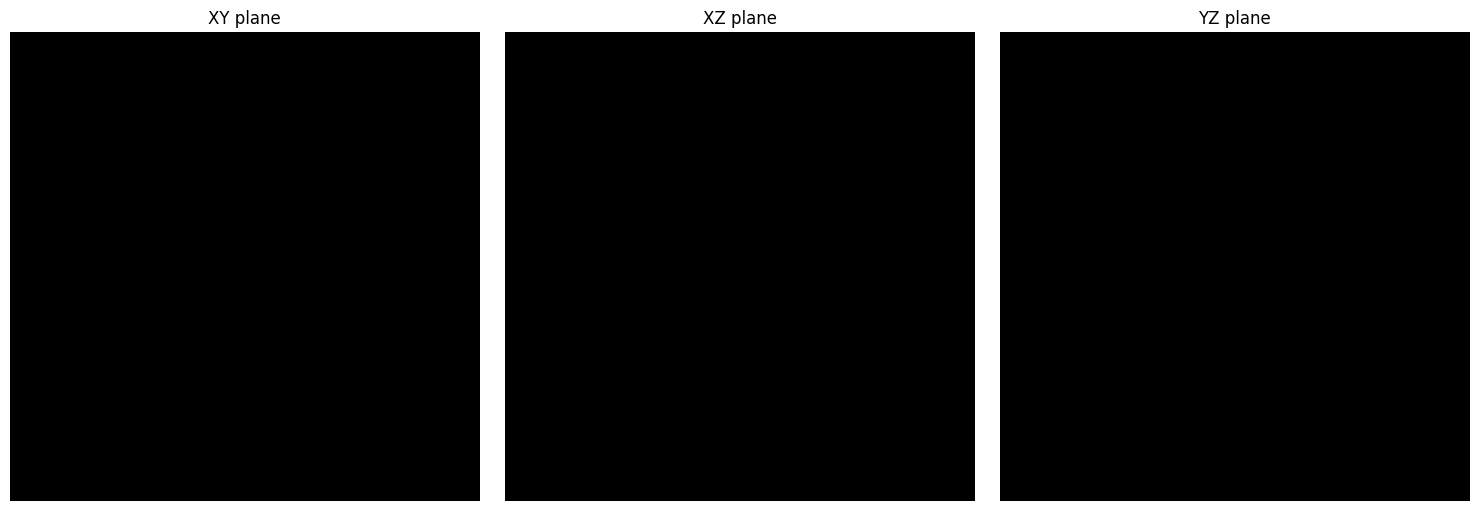

Chunk shape: (256, 256, 256)


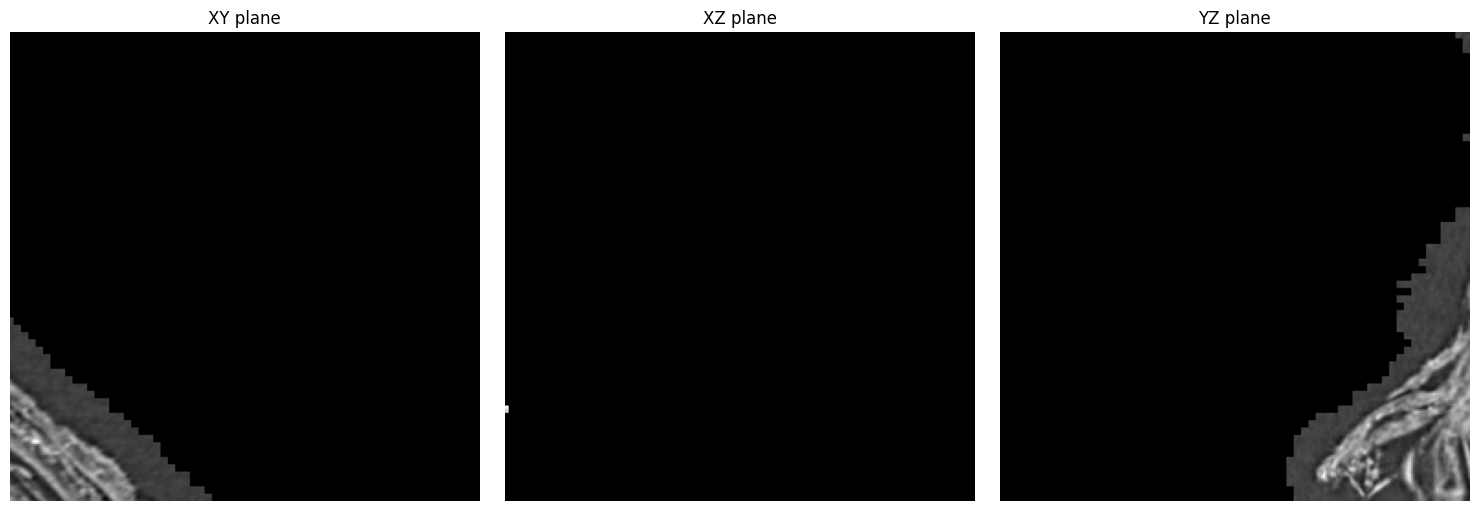

Chunk shape: (256, 256, 256)


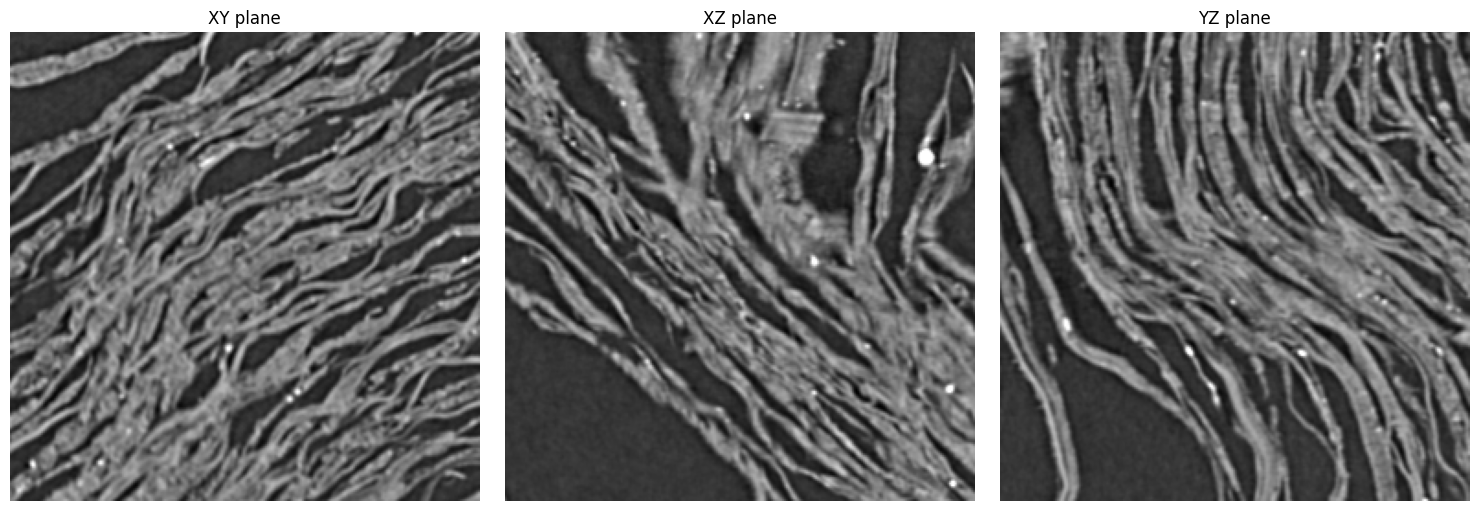

Chunk shape: (256, 256, 256)


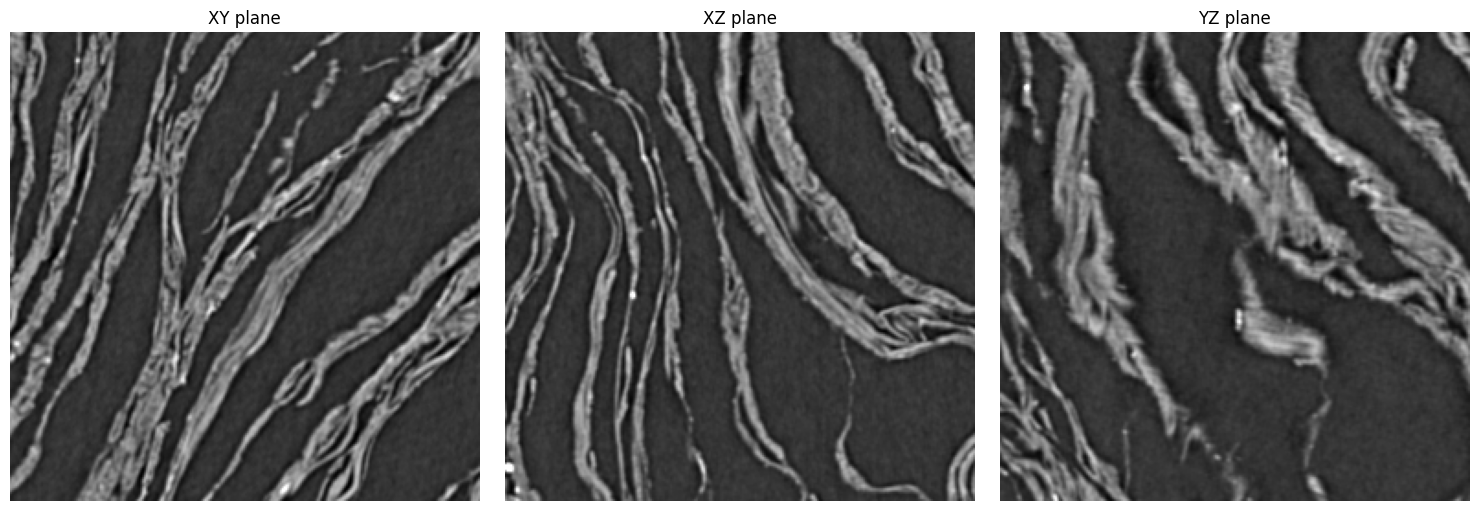

Chunk shape: (256, 256, 256)


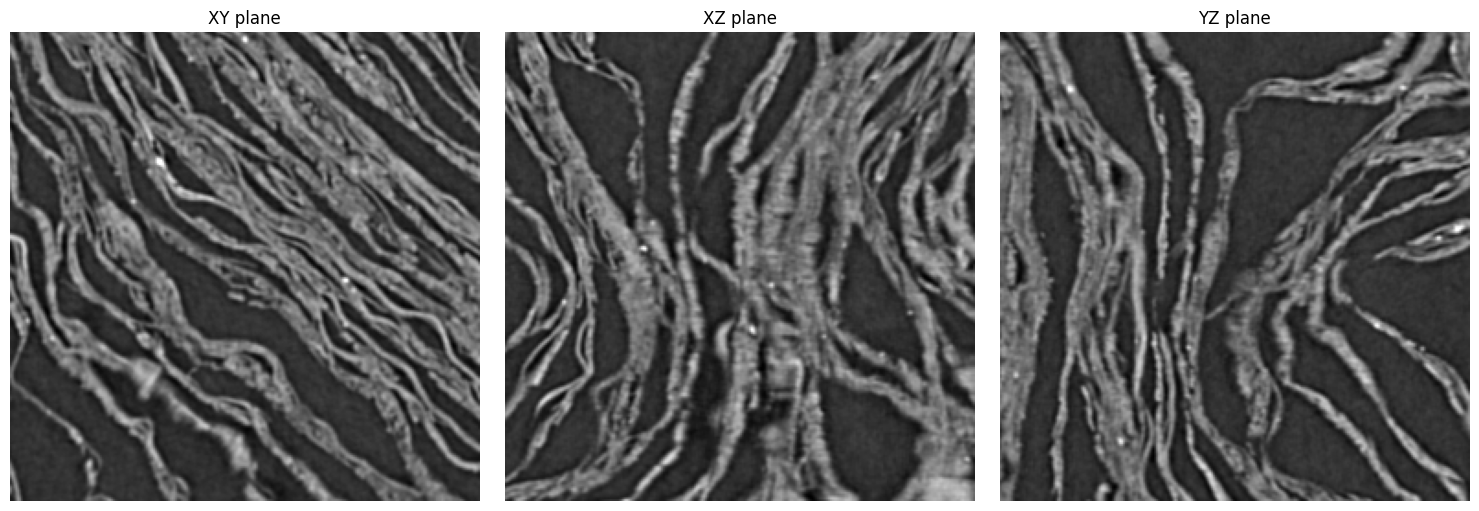

Chunk shape: (256, 256, 256)


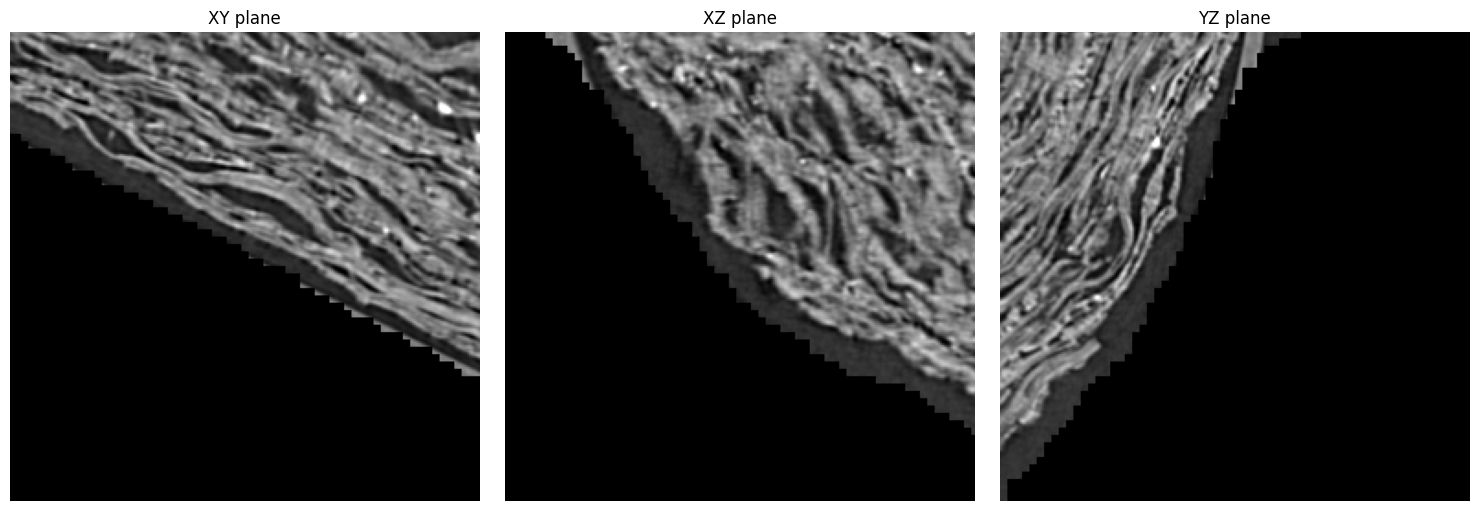

Chunk shape: (256, 256, 256)


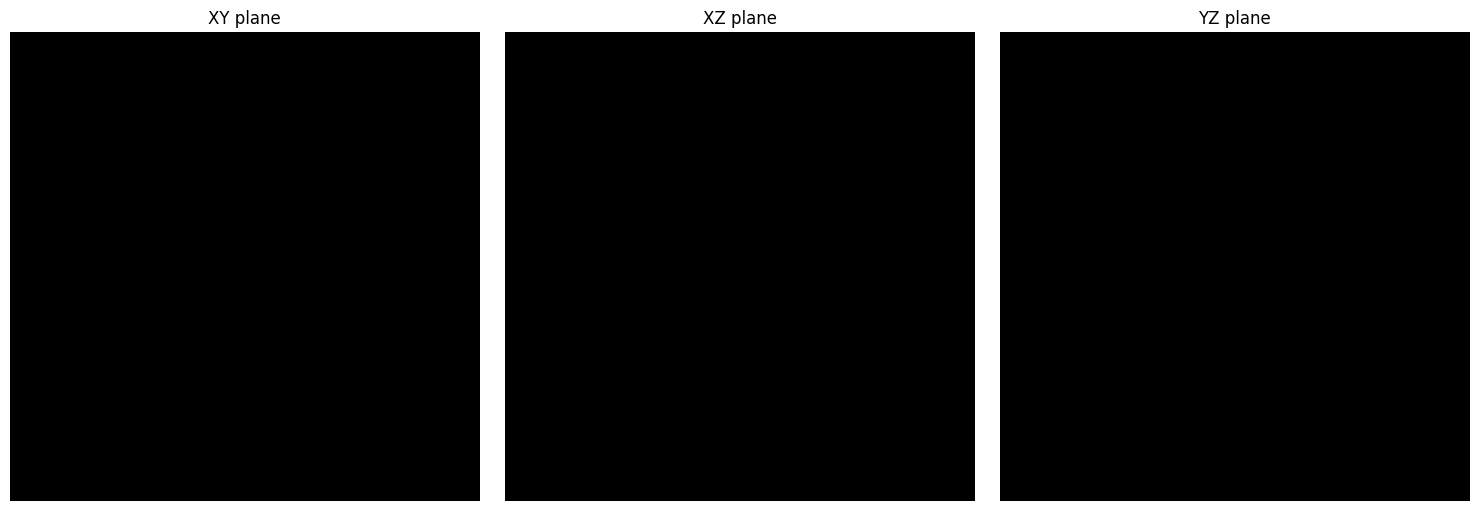

In [22]:
for i in range(0, 6621, 1000):
    chunk = scroll[10000:10000+CHUNK_SIZE,i:i+CHUNK_SIZE,2538:2538+CHUNK_SIZE]
    print(f"Chunk shape: {chunk.shape}")

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Z=100, XY
    axes[0].imshow(chunk[100, :, :])
    axes[0].set_title('XY plane')
    axes[0].axis('off')

    # Y=100, XZ
    axes[1].imshow(chunk[:, 100, :])
    axes[1].set_title('XZ plane')
    axes[1].axis('off')

    # X=100, YZ
    axes[2].imshow(chunk[:, :, 100])
    axes[2].set_title('YZ plane')
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()

Cool! We have extracted a chunk of _unlabeled_ data that could be used in the competition, either in _unsupervised_ or, after labeling, in _supervised_ approaches!

**Good luck!**